Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

sns.set(style='ticks')
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier as RF




Reading and Displaying the DataSet

In [ ]:
dataset = pd.read_csv('pd_speech_features.csv')


dataset

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [ ]:
target_columns=["VFER_entropy","VFER_NSR_TKEO","mean_MFCC_11th_coef","VFER_NSR_SEO","VFER_mean","std_4th_delta_delta","RPDE","DFA","apq11Shimmer","meanHarmToNoiseHarmonicity","class"];
releif_columns=["mean_MFCC_1st_coef","mean_MFCC_11th_coef","mean_MFCC_2nd_coef","mean_MFCC_3rd_coef","VFER_NSR_TKEO","VFER_NSR_SEO","mean_MFCC_9th_coef","mean_MFCC_7th_coef","mean_MFCC_8th_coef","mean_MFCC_6th_coef",'class']
training_cols=releif_columns
training_dataset=dataset[releif_columns]

dataset=dataset[target_columns]
dataset.dropna()

,VFER_entropy,VFER_NSR_TKEO,mean_MFCC_11th_coef,VFER_NSR_SEO,VFER_mean,std_4th_delta_delta,RPDE,DFA,apq11Shimmer,meanHarmToNoiseHarmonicity,class
0,0.83621,1.2825,-0.006825,1.3305,0.000463,0.029594,0.57227,0.71826,0.04828,18.995,1
1,1.04550,1.3063,0.057552,1.3177,0.000615,0.038709,0.53966,0.69481,0.06195,21.497,1
2,0.63668,1.2614,0.286980,1.3078,0.000360,0.039222,0.58982,0.67604,0.07772,17.651,1
3,0.45452,1.2369,-0.754270,1.2986,0.000196,0.018382,0.59257,0.79672,0.04462,19.865,1
4,0.71541,1.2360,-0.880070,1.3156,0.000281,0.020515,0.53028,0.79782,0.05278,19.557,1
...,...,...,...,...,...,...,...,...,...,...,...
751,30.50930,1.2526,-0.820310,1.4734,0.019310,0.014774,0.28385,0.56355,0.01547,26.813,0
752,6.58010,1.2163,-0.164080,1.4004,0.002685,0.027349,0.59194,0.56499,0.03272,17.802,0
753,0.38927,1.0833,0.305090,1.1821,0.000113,0.016380,0.46815,0.72335,0.02271,24.005,0
754,0.40543,1.1051,0.659360,1.1383,0.000138,0.018511,0.49823,0.74890,0.02648,19.706,0


Printing Data Set Types

In [ ]:
# Displaying the shape and datatype for each attribute
print(dataset.shape)
dataset.dtypes

(756, 11)


VFER_entropy                  float64
VFER_NSR_TKEO                 float64
mean_MFCC_11th_coef           float64
VFER_NSR_SEO                  float64
VFER_mean                     float64
std_4th_delta_delta           float64
RPDE                          float64
DFA                           float64
apq11Shimmer                  float64
meanHarmToNoiseHarmonicity    float64
class                           int64
dtype: object

Statistics

In [ ]:
dataset.describe()

,VFER_entropy,VFER_NSR_TKEO,mean_MFCC_11th_coef,VFER_NSR_SEO,VFER_mean,std_4th_delta_delta,RPDE,DFA,apq11Shimmer,meanHarmToNoiseHarmonicity,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,4.020686,1.230503,-0.319437,1.266200,0.001790,0.023900,0.489058,0.700414,0.055366,18.859632,0.746032
std,6.247897,0.073156,0.596488,0.085932,0.002622,0.009067,0.137442,0.069718,0.033939,5.576473,0.435568
min,0.023346,0.944310,-2.482600,1.076800,0.000007,0.009497,0.154300,0.543500,0.000370,1.655000,0.000000
25%,0.940145,1.181050,-0.713730,1.201100,0.000464,0.017551,0.386537,0.647053,0.030963,15.713250,0.000000
50%,2.210250,1.228700,-0.363125,1.261900,0.001009,0.021220,0.484355,0.700525,0.047545,19.309500,1.000000
75%,4.255975,1.283350,0.056467,1.321300,0.001925,0.027858,0.586515,0.754985,0.071385,22.877750,1.000000
max,77.572700,1.403000,2.135800,1.622000,0.031693,0.063242,0.871230,0.852640,0.277500,33.197000,1.000000


Checking for Null values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VFER_entropy                756 non-null    float64
 1   VFER_NSR_TKEO               756 non-null    float64
 2   mean_MFCC_11th_coef         756 non-null    float64
 3   VFER_NSR_SEO                756 non-null    float64
 4   VFER_mean                   756 non-null    float64
 5   std_4th_delta_delta         756 non-null    float64
 6   RPDE                        756 non-null    float64
 7   DFA                         756 non-null    float64
 8   apq11Shimmer                756 non-null    float64
 9   meanHarmToNoiseHarmonicity  756 non-null    float64
 10  class                       756 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 65.1 KB


Univariate and BiVariate Analysis of Different Attributes

HeatMap Visualization for each Attribute

                            VFER_entropy  VFER_NSR_TKEO  mean_MFCC_11th_coef  \
VFER_entropy                    1.000000       0.387934            -0.090053   
VFER_NSR_TKEO                   0.387934       1.000000            -0.179491   
mean_MFCC_11th_coef            -0.090053      -0.179491             1.000000   
VFER_NSR_SEO                    0.460506       0.467230            -0.057882   
VFER_mean                       0.982540       0.397305            -0.104558   
std_4th_delta_delta            -0.107633      -0.020822             0.228736   
RPDE                           -0.400983      -0.293821             0.132675   
DFA                            -0.384040      -0.200433            -0.071030   
apq11Shimmer                   -0.252501      -0.180972             0.104104   
meanHarmToNoiseHarmonicity      0.315978       0.374186            -0.156786   
class                          -0.278312      -0.041207             0.058081   

                            VFER_NSR_SE

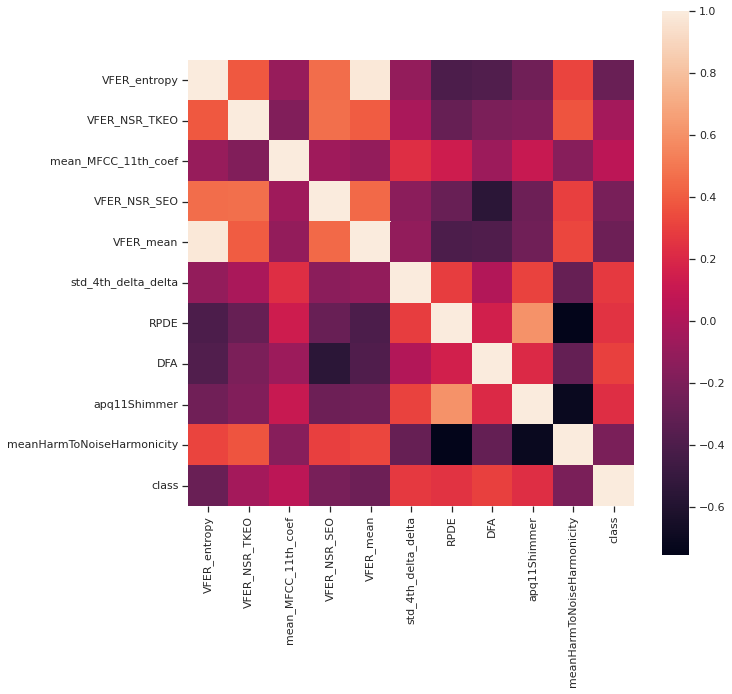

In [ ]:
corr_map=dataset.corr()
print(corr_map)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sb.heatmap(corr_map,square=True)

Correlation coefficient values in each attributes

In [ ]:
correlation_values=dataset.corr(method='pearson')['class']
correlation_values.sort_values(ascending=False)

class                         1.000000
DFA                           0.306070
std_4th_delta_delta           0.277313
RPDE                          0.247444
apq11Shimmer                  0.227427
mean_MFCC_11th_coef           0.058081
VFER_NSR_TKEO                -0.041207
meanHarmToNoiseHarmonicity   -0.210938
VFER_NSR_SEO                 -0.214637
VFER_mean                    -0.265686
VFER_entropy                 -0.278312
Name: class, dtype: float64

# Comparison of Measured K-P coefficient with Paper Results
**VFER entropy**: 


*   Measured Value: -0.278
*   Reference Value: -0.388
*   Error: 0.02

**VFER NSR, TKEO**: 


*   Measured Value: -0.041
*   Reference Value: -0.379
*   Error: 0.338

**11th MFCC coef**: 


*   Measured Value: 0.058
*   Reference Value: -0.369
*   Error: 0.427

**VFER NSR, SEO**: 


*   Measured Value: -0.214
*   Reference Value: -0.365
*   Error: 0.151

**4th MFCC delta**: 


*   Measured Value: 0.277
*   Reference Value: -0.363
*   Error: 0.640

**VFER mean**: 


*   Measured Value: -0.265
*   Reference Value: -0.321
*   Error: 0.056

**RPDE**: 


*   Measured Value: 0.247
*   Reference Value: 0.292
*   Error: 0.045

**DFA**: 


*   Measured Value: 0.306
*   Reference Value: 0.287
*   Error: 0.019

**Shimmer PQ11 **: 


*   Measured Value: 0.227
*   Reference Value: 0.285
*   Error: 0.058

**HNR mean **: 


*   Measured Value: -0.210
*   Reference Value: -0.388
*   Error: 0.178






# Normalizing data between -1 and 1

In [ ]:
df=training_dataset
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df['class']=dataset['class']


Seperating of Features And Data

In [ ]:
X = normalized_df[releif_columns[:len(releif_columns)-1]]
Y = normalized_df['class'] ##Target Column

In [ ]:
print(X)

     mean_MFCC_1st_coef  mean_MFCC_11th_coef  mean_MFCC_2nd_coef  \
0              0.722779             0.536068            0.648846   
1              0.724860             0.550007            0.692990   
2              0.645606             0.599684            0.727579   
3              0.563136             0.374227            0.714858   
4              0.538102             0.346988            0.697982   
..                  ...                  ...                 ...   
751            0.398066             0.359928            0.169436   
752            0.444962             0.502018            0.225926   
753            0.579590             0.603605            0.259721   
754            0.724300             0.680314            0.362571   
755            0.658989             0.587768            0.458374   

     mean_MFCC_3rd_coef  VFER_NSR_TKEO  VFER_NSR_SEO  mean_MFCC_9th_coef  \
0              0.484759       0.737295      0.465334            0.524275   
1              0.433574       0

In [ ]:
print (Y)

0      1
1      1
2      1
3      1
4      1
      ..
751    0
752    0
753    0
754    0
755    0
Name: class, Length: 756, dtype: int64


***Splitting Data to Train and Test (70-30)***

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(756, 10) (529, 10) (227, 10)


# Support Vector Machine Model

# HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import math
powers_of_two=[]
for i in range(-15,16,2):
  powers_of_two.append(math.pow(2,i))
print(powers_of_two)
# defining parameter range
param_grid = {'C': powers_of_two[0:10],
              'gamma': powers_of_two[len(powers_of_two)-10:len(powers_of_two)],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, Y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)



[3.0517578125e-05, 0.0001220703125, 0.00048828125, 0.001953125, 0.0078125, 0.03125, 0.125, 0.5, 2.0, 8.0, 32.0, 128.0, 512.0, 2048.0, 8192.0, 32768.0]
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=3.0517578125e-05, gamma=0.125, kernel=rbf;, score=0.755 total time=   0.0s
[CV 2/5] END C=3.0517578125e-05, gamma=0.125, kernel=rbf;, score=0.755 total time=   0.0s
[CV 3/5] END C=3.0517578125e-05, gamma=0.125, kernel=rbf;, score=0.745 total time=   0.0s
[CV 4/5] END C=3.0517578125e-05, gamma=0.125, kernel=rbf;, score=0.745 total time=   0.0s
[CV 5/5] END C=3.0517578125e-05, gamma=0.125, kernel=rbf;, score=0.752 total time=   0.0s
[CV 1/5] END C=3.0517578125e-05, gamma=0.5, kernel=rbf;, score=0.755 total time=   0.0s
[CV 2/5] END C=3.0517578125e-05, gamma=0.5, kernel=rbf;, score=0.755 total time=   0.0s
[CV 3/5] END C=3.0517578125e-05, gamma=0.5, kernel=rbf;, score=0.745 total time=   0.0s
[CV 4/5] END C=3.0517578125e-05, gamma=0.5, kernel=rbf;, score=0.745 tot

# Splitting Data to Train and Test (70-30)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf =KFold(n_splits=4, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
score = cross_val_score(svm.SVC(kernel='rbf',C=2,gamma=8), X, Y, cv= kf)


print('Accuracy scores of test data (70-30) : ', score)
print('Accuracy scores of test data (70-30) : ', score.mean())

Fold:1, Train set: 567, Test set:189
Fold:2, Train set: 567, Test set:189
Fold:3, Train set: 567, Test set:189
Fold:4, Train set: 567, Test set:189
Accuracy scores of test data (70-30) :  [0.88359788 0.87301587 0.9047619  0.83597884]
Accuracy scores of test data (70-30) :  0.8743386243386243


***Splitting Data to Train and Test (80-20)***

In [ ]:
# accuracy score on training data
# X_test_prediction = model.predict(X_test)
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
score = cross_val_score(svm.SVC(kernel='rbf',C=2,gamma=8), X, Y, cv= kf)


print('Accuracy scores of test data (80-20) : ', score)
print('Accuracy scores of test data (80-20) : ', score.mean())

Fold:1, Train set: 604, Test set:152
Fold:2, Train set: 605, Test set:151
Fold:3, Train set: 605, Test set:151
Fold:4, Train set: 605, Test set:151
Fold:5, Train set: 605, Test set:151
Accuracy scores of test data (80-20) :  [0.90131579 0.87417219 0.90728477 0.88741722 0.82119205]
Accuracy scores of test data (80-20) :  0.8782764029278495


***Splitting Data to Train and Test (90-10)***

In [ ]:
# accuracy score on training data
# X_test_prediction = model.predict(X_test)
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
score = cross_val_score(svm.SVC(kernel='rbf',C=2,gamma=8), X, Y, cv= kf)


print('Accuracy scores of test data (90-10) : ', score)
print('Accuracy scores of test data (90-10) : ', score.mean())


Fold:1, Train set: 680, Test set:76
Fold:2, Train set: 680, Test set:76
Fold:3, Train set: 680, Test set:76
Fold:4, Train set: 680, Test set:76
Fold:5, Train set: 680, Test set:76
Fold:6, Train set: 680, Test set:76
Fold:7, Train set: 681, Test set:75
Fold:8, Train set: 681, Test set:75
Fold:9, Train set: 681, Test set:75
Fold:10, Train set: 681, Test set:75
Accuracy scores of test data (90-10) :  [0.92105263 0.89473684 0.85526316 0.92105263 0.89473684 0.93421053
 0.86666667 0.90666667 0.81333333 0.81333333]
Accuracy scores of test data (90-10) :  0.8821052631578945


***Random Forest Results***

# Random Forest 70-30

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
classifier = RF(n_estimators=500)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

print("Random Forest Classifier :")

print("Comparison between real and before PCA")
print('Accuracy Score:', accuracy_score(Y_test, y_pred))


(756, 10) (529, 10) (227, 10)
Random Forest Classifier :
Comparison between real and before PCA
Accuracy Score: 0.8193832599118943


# Random Forest 80-20

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
classifier = RF(n_estimators=500)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

print("Random Forest Classifier :")

print("Comparison between real and before PCA")
print('Accuracy Score:', accuracy_score(Y_test, y_pred))

(756, 10) (604, 10) (152, 10)
Random Forest Classifier :
Comparison between real and before PCA
Accuracy Score: 0.8552631578947368


# Random Forest 90-10

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
classifier = RF(n_estimators=500)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

print("Random Forest Classifier :")

print("Comparison between real and before PCA")
print('Accuracy Score:', accuracy_score(Y_test, y_pred))

(756, 10) (680, 10) (76, 10)
Random Forest Classifier :
Comparison between real and before PCA
Accuracy Score: 0.8421052631578947
